# Introdução
Este trabalho faz parte das atividades avaliativas da disciplina
Ciência de Redes, período 2021/3, do curso de Mestrado em Ciência da
Computação do CEFET/RJ.



# Grupo de trabalho

> ## Grupo 3
> ### Alexandre Emilio Manhães Pardelinha - alexandre.pardelinha@aluno.cefet-rj.br 
> ### Augusto José Moreira da Fonseca - augusto.fonseca@aluno.cefet-rj.br



# Descrição da tarefa

Nesta tarefa você deve instalar e se familiarizar com a biblioteca de análise de redes NetworkX. Você deve escolher ao menos uma rede disponível no repositório The Colorado Index of Complex Networks (ICON) (https://icon.colorado.edu/#!/), e caracterizá-la utilizando diferentes métricas, como grau, distância e clusterização (você pode escolher as outras). Para cada métrica analisada, calcule as seguintes estatísticas: máximo, mínimo, média, desvio padrão, e distribuição empírica. Faça um relatório discorrendo sobre os valores obtidos. Submeta o relatório nesta tarefa.

### Requisitos
* Métricas: grau, distância, clusterização (pode escolher as outras)
* Para cada métrica analisada, calcular as seguintes estatísticas: máximo, mínimo, média, desvio padrão, e distribuição empírica.

### Entregável
* Relatório discorrendo sobre os valores obtidos.

### Prazo para entrega
* 11 Nov 2021, às 23:59h

# Bibliotecas utilizadas

### [NetworkX](https://networkx.org/)
* Pacote Python para a criação, manipulação e estudo da estrutura, dinâmica e funções de redes complexas.

### [Pandas](https://pandas.pydata.org/)
* Ferramenta de análise e manipulação de dados, desenvolvida com base na linguagem de programação Python

### [Matplotlib](https://matplotlib.org/)
* Biblioteca para a criação de visualizações estáticas, animadas e interativas em Python.

### [Seaborn](https://seaborn.pydata.org/)
* Biblioteca Python de visualização de dados baseada em Matplotlib. Fornece uma interface de alto nível para desenhar gráficos estatísticos e informativos.

# Conjunto de Dados

* O conjunto de dados empregado nesta tarefa foi coletado a partir do site [The Colorado Index of Complex Networks (ICON)](https://icon.colorado.edu/#!/).

* A Figura 1 apresenta as informações do conjunto de dados escolhido. O conjunto de dados pertence ao domínio de voos domésticos entre aeroportos do Reino Unido. Os dados estão separados em arquivos CSV, um para cada ano entre 1990 e 2003, sendo cada arquivo uma rede separada. Nós representam os aeroportos e as arestas representam voos ocorridos entre os aeroportos. As arestas possuem um peso associado que denota a quantidade total de passageiros transportados no ano.

* Link direto para download dos dados: https://www.bifi.es/~cardillo/datasets/uk-air-time_varying.zip

| ![](https://drive.google.com/uc?export=view&id=1wPoY_YD1z6ed5dPvLt5T1NE8YjKHHBcY) |
|:--:| 
| *Figura 1. Informações sobre o conjunto de dados empregado na tarefa.* |

# Download e descompactação do conjunto de dados

In [ ]:
!mkdir /content/data
!wget https://www.bifi.es/~cardillo/datasets/uk-air-time_varying.zip -O /content/data/uk-air-time_varying.zip
!unzip /content/data/uk-air-time_varying.zip -d /content/data

--2021-11-11 23:37:33--  https://www.bifi.es/~cardillo/datasets/uk-air-time_varying.zip
Resolving www.bifi.es (www.bifi.es)... 193.146.116.98
Connecting to www.bifi.es (www.bifi.es)|193.146.116.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34439 (34K) [application/zip]
Saving to: ‘/content/data/uk-air-time_varying.zip’

/content/data/uk-ai 100%[===================>]  33.63K  --.-KB/s    in 0.1s    

2021-11-11 23:37:34 (250 KB/s) - ‘/content/data/uk-air-time_varying.zip’ saved [34439/34439]

Archive:  /content/data/uk-air-time_varying.zip
  inflating: /content/data/README    
  inflating: /content/data/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_1990_adjlist.csv  
  inflating: /content/data/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_1991_adjlist.csv  
  inflating: /content/data/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_1992_adjlist.csv  
  inflating: /content/data/Table_1_12_Domestic_Passengers_Uplifted_B

# Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

# Exploração do conjunto de dados com Pandas

* Foi escolhido o arquivo de dados refente ao ano de 2003.
* Para a exploração dos dados empregamos a biblioteca Pandas que carrega em memória os dados do arquivo CSV, na forma de um Pandas DataFrame.
* O DataFrame carregado apresenta em cada linha uma aresta com o respectivo peso associado que denota a quantidade total de passageiros transportados no ano entre o par de aeroportos.
* Uma vez que o conjunto de dados é extenso, empregamos o método `pandas.DataFrame.head()` (executado na última linha) para visualizar apenas os primeiros registros.

In [ ]:
filepath = '/content/data/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_2003_adjlist.csv'
data = pd.read_csv(filepath, 
                   delimiter=';')
data.drop(labels=data.columns[3], 
          axis=1, 
          inplace=True)
data.head()

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,483226
1,HEATHROW,BELFAST CITY,743758
2,HEATHROW,BELFAST INTERNATIONAL,25963
3,HEATHROW,EDINBURGH,1577063
4,HEATHROW,GLASGOW,1345532


* O conjunto de dados possui 238 arestas e não há dados faltantes.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   #this_apt_name  238 non-null    object
 1   that_apt_name   238 non-null    object
 2   passengers      238 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


# Carregando o grafo com o NetworkX
* Para carregar os dados em memória na forma de uma estrutura em grafo, empregamos a biblioteca NetworkX. 
* Como o arquivo de dados foi definido como uma lista de arestas com peso associado, empregamos o método `read_weighted_edgelist` para o carregamento.

In [ ]:
G = nx.read_weighted_edgelist(filepath,
                              delimiter=';')
nx.info(G)

'Graph with 46 nodes and 238 edges'

In [ ]:
list(G.edges(data=True))[:5]

[('HEATHROW', 'ABERDEEN', {'weight': 483226.0}),
 ('HEATHROW', 'BELFAST CITY', {'weight': 743758.0}),
 ('HEATHROW', 'BELFAST INTERNATIONAL', {'weight': 25963.0}),
 ('HEATHROW', 'EDINBURGH', {'weight': 1577063.0}),
 ('HEATHROW', 'GLASGOW', {'weight': 1345532.0})]

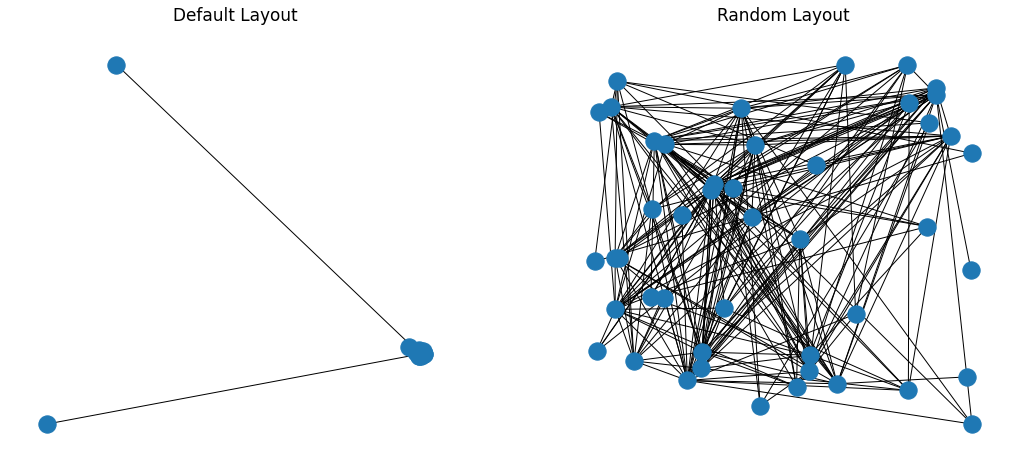

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
ax1.set_title('Default Layout', fontsize=17)
ax2.set_title('Random Layout', fontsize=17)
nx.draw(G, ax=ax1)
nx.draw_random(G, ax=ax2)

# Estatísticas do grafo

## Densidade
* **Densidade de um grafo:** uma função entre o número de vértices e o número de arestas.
* A densidade do grafo apresentou um resultado mais próximo de 0 que de 1, tornando-se um grafo esparso.
* Grafos esparsos possuem um pequeno número de arestas em relação ao número de vértices.

In [ ]:
nx.density(G)

0.22995169082125605

## Diâmetro
* **Diâmetro de um grafo:** maior distância entre dois vértices do grafo.
* O diâmetro apresentou um resultado igual a 4 que é a maior distância entre qualquer par de aeroportos.

In [ ]:
nx.diameter(G)

4

## Coeficiente Médio de Clustering

* **Coeficiente Médio de Clustering:** valor médio dos Coeficientes de Clustering Local de todos os vértices.
* O Coeficiente Médio de Clustering apresentou resultado igual a 0,554.




In [ ]:
nx.average_clustering(G)

0.5537914418720395

# Calculando as métricas

## Grau
* **Grau do vértice:** número de arestas incidentes em um vértice.
* **Grau médio do grafo:** média de todos os graus dos vértices.
* O grau médio do grafo apresentou resultado igual a 10,35.



* O método `nx.Graph.degree()` retorna uma lista dos graus de todos os vértices do grafo.
* Para facilitar o cálculo das estatísticas, a lista de graus foi instanciada em um Pandas DataFrame.

In [ ]:
df_degree = pd.DataFrame(data=G.degree(),
                         columns=['node', 'degree'])
df_degree.head()

,node,degree
0,HEATHROW,10
1,ABERDEEN,24
2,BELFAST CITY,19
3,BELFAST INTERNATIONAL,16
4,EDINBURGH,27


In [ ]:
df_degree.describe()

,degree
count,46.000000
mean,10.347826
std,7.251720
min,1.000000
25%,4.000000
50%,10.000000
75%,14.750000
max,27.000000


### Análise com boxplot

* **Boxplot:** diagrama de caixa utilizando as referências de valores mínimos e máximos, quartis e outliers de uma base de dados.

* O 1º quartil ou 25º percentil do grau do vértice é de valor 4. Isso significa que pelo menos 25% dos vértices tem no máximo grau 4. 

* O 3º quartil ou 75º percentil do grau do vértice é de valor 14,75. Isso significa que pelo menos 75% dos vértices tem no máximo grau 14.

* Como a mediana está mais próxima do 1º quartil, os dados têm uma distribuição assimétrica positiva. Isso significa que cada vez mais vértices da rede têm graus baixos.




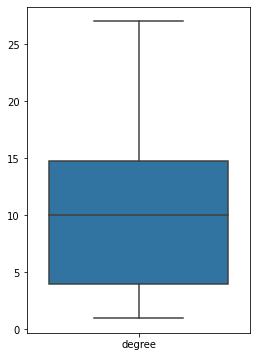

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df_degree)

### Análise da distribuição dos graus


In [ ]:
df_degree_count = df_degree.groupby('degree').count().reset_index()
df_degree_count.columns = ['degree', 'frequency']
df_degree_count['relative_frequency'] = df_degree_count['frequency'] / len(G.nodes)
df_degree_count

,degree,frequency,relative_frequency
0,1,4,0.086957
1,2,3,0.065217
2,3,2,0.043478
3,4,5,0.108696
4,5,2,0.043478
5,6,1,0.021739
6,8,3,0.065217
7,9,2,0.043478
8,10,2,0.043478
9,11,6,0.130435


* O grau 11 é o que possui maior frequência absoluta (moda) de valor 6.

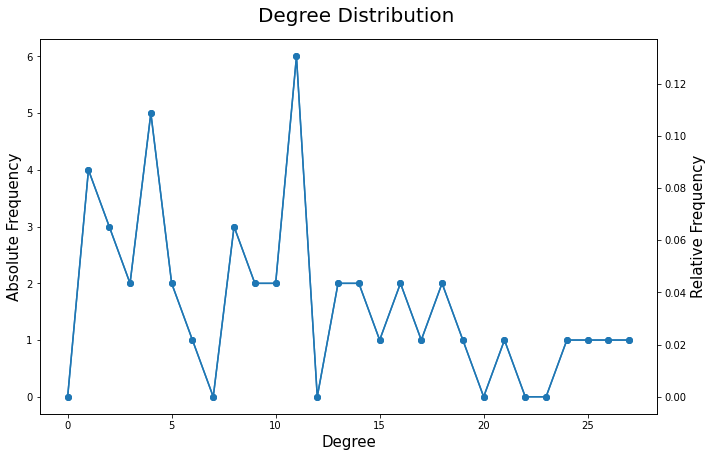

In [ ]:
degree_freq = nx.degree_histogram(G)
relative_degree_freq = [degree/len(G.nodes) for degree in degree_freq]
degrees = range(len(degree_freq))

fig, ax1 = plt.subplots()
fig.set_size_inches(10,6)
fig.suptitle('Degree Distribution', 
             fontsize=20,
             y=1.05)

ax1.set_xlabel('Degree', fontsize=15)
ax1.set_ylabel('Absolute Frequency', fontsize=15)
ax1.plot(degrees, degree_freq, 'o-')

ax2 = ax1.twinx()
ax2.set_ylabel('Relative Frequency', fontsize=15)
ax2.plot(degrees, relative_degree_freq, 'o-')

fig.tight_layout()

## Distância
* **Distância:** menor caminho entre dois vértices.
* **Distância média do grafo:** média de todas as distâncias entre todos os pares de vértices do grafo.
* A distância média do grafo apresentou resutado aproximado igual a 2.

* O método `nx.all_pairs_shortest_path_length()` retorna uma lista com o tamanho do menor caminho entre todos os pares de vértices do grafo.
* Para facilitar o cálculo das estatísticas, a referida lista foi instanciada em um Pandas DataFrame.

In [ ]:
# getting list of all distances
all_shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
df_shortest_paths = pd.DataFrame(all_shortest_paths)
all_distances = list()
for column in df_shortest_paths.columns:
  all_distances += df_shortest_paths[column].values.tolist()
all_distances = list(filter(lambda x: x != 0, all_distances))  # removing self-loop

# frequency
df_distances = pd.DataFrame({'distance': all_distances})
df_distances.describe()

,distance
count,2070.000000
mean,2.037681
std,0.754897
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


* A distância média do grafo também pode ser calculado por meio do método `average_shortest_path_length` do NetworkX.

In [ ]:
print(nx.average_shortest_path_length(G))

2.03768115942029


### Análise com boxplot
* Os três quartis (25, 50 e 75) apresentaram o mesmo valor, tornando a amplitude interquartil nula. Isso significa que os valores das distâncias estão concentrados.
* Pelo menos 75% das distâncias tem valor máximo 2.

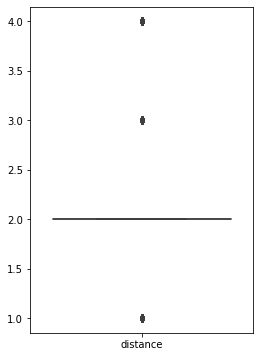

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df_distances)

### Análise da distribuição das distâncias.
* A distância 2 é a que possui maior frequência absoluta (moda), sendo muito maior que as outras três distâncias (1,3 e 4).
* O gráfico denota que mais da metade dos caminhos entre os aeroportos são possíveis com apenas uma escala de voo.

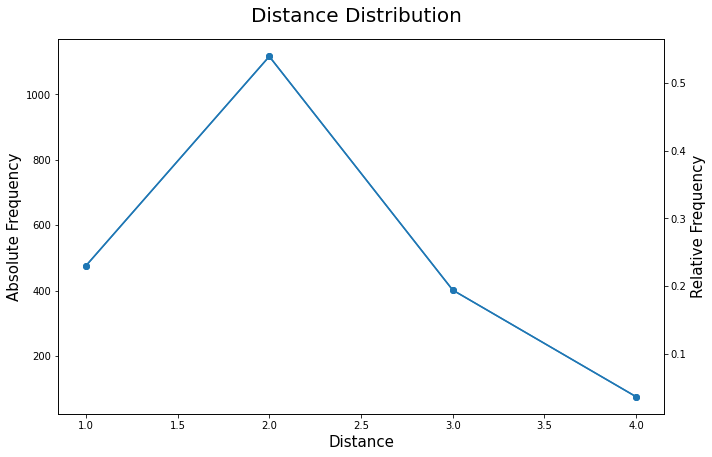

In [ ]:
distances_frequency = df_distances.value_counts().to_dict()
distances_relative_frequency = df_distances.value_counts(normalize=True).to_dict()
distances = sorted(distances_frequency.keys()) # {1: 476, 2: 1116, 3: 402, 4: 76}
distances_frequency = [distances_frequency[key] for key in distances]
distances_relative_frequency = [distances_relative_frequency[key] for key in distances]

fig, ax1 = plt.subplots()
fig.set_size_inches(10,6)
fig.suptitle('Distance Distribution', 
             fontsize=20,
             y=1.05)

ax1.set_xlabel('Distance', fontsize=15)
ax1.set_ylabel('Absolute Frequency', fontsize=15)
ax1.plot(distances, distances_frequency, 'o-')

ax2 = ax1.twinx()
ax2.set_ylabel('Relative Frequency', fontsize=15)
ax2.plot(distances, distances_relative_frequency, 'o-')

fig.tight_layout()

## Coeficiente de Clustering

* **Coeficiente de Clustering Local:** mede o grau de densidade de ligações da vizinhança de um determinado nó.

* O método `nx.clustering()` retorna uma lista com o coeficiente de clustering de todos os vértices do grafo.
* Para facilitar o cálculo das estatísticas, a lista de coeficientes de clustering foi instanciada em um Pandas DataFrame.

In [ ]:
# getting list of all distances
clustering_data = nx.clustering(G)
nodes = list(clustering_data.keys())
coeficients = list(clustering_data.values())
clustering_dict = {'node': nodes,
                   'coeficient': coeficients}
df_all_coeficient = pd.DataFrame(data=clustering_dict)
df_all_coeficient.head()

,node,coeficient
0,HEATHROW,0.666667
1,ABERDEEN,0.391304
2,BELFAST CITY,0.514620
3,BELFAST INTERNATIONAL,0.516667
4,EDINBURGH,0.378917


In [ ]:
df_all_coeficient.describe()

,coeficient
count,46.000000
mean,0.553791
std,0.291260
min,0.000000
25%,0.395859
50%,0.555771
75%,0.677110
max,1.000000


### Análise com boxplot

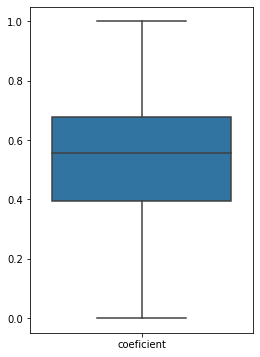

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df_all_coeficient)

### Análise da distribuição dos coeficientes

Text(0, 0.5, 'Frequency')

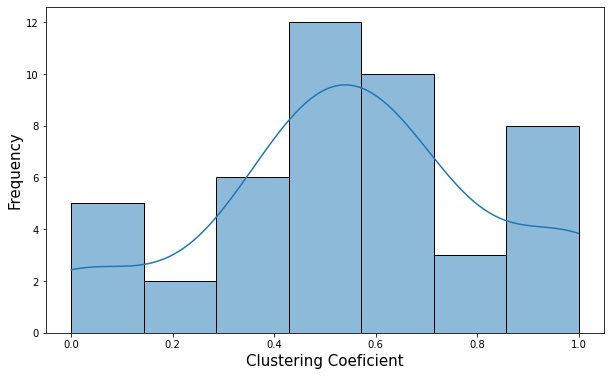

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_all_coeficient, 
             kde=True,
             legend=False)
ax.set_xlabel('Clustering Coeficient',
              fontsize=15)
ax.set_ylabel('Frequency',
              fontsize=15)

# Análise temporal

* Uma vez que o conjunto de dados possui redes separadas entre os anos de 1990 e 2003, é possível fazer uma análise temporal
* Como estratégia, decidimos analisar o fluxo de passageiros nos três aeroportos com maior fluxo ao longo dos anos
* O objetivo é analisar o crescimento ou decrescimento do fluxo

## Obtendo a lista de arquivos de dados

In [ ]:
import os
files = [filepath for filepath in os.listdir('data') if filepath.startswith('Table')]
files = sorted(files)

## Calculando o total de movimentação dos aeroportos por ano

* O método `Graph.degree()` do NetworkX permite o cálculo do grau dos vértices baseado no atributo `weight` das arestas incidentes.
* Uma vez que a aresta denota o total de passageiros transportados entre os aeroportos, foi possível criar um DataFrame com o total de passageiros por ano, para cada aeroporto.

In [ ]:
df = pd.read_csv(f'data/{files[0]}',
                 delimiter=';')
airports = pd.concat([df['#this_apt_name'], df['that_apt_name']],
                     ignore_index=True).unique()
df_all_years = pd.DataFrame(data={'airport': airports})
years = list(range(1990,2004))

for i, year in enumerate(years):
  G = nx.read_weighted_edgelist(f'data/{files[i]}',
                              delimiter=';')
  weighted_degrees = G.degree(weight='weight')
  df = pd.DataFrame(weighted_degrees, 
                    columns=['airport', year])
  df_all_years = pd.merge(df,
                          df_all_years,
                          how='outer',
                          on='airport')
df = df_all_years.sort_values(by=2003, ascending=False).reset_index(drop=True)
df

,airport,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,HEATHROW,6176092.0,6191152.0,6118654.0,6881525.0,6622874.0,6667760.0,6796712.0,6930188.0,6856305.0,6669339.0,6289349.0,6268289.0,6305706.0,6948785.0
1,EDINBURGH,5261352.0,4868635.0,4023286.0,3775158.0,3550893.0,3248810.0,3089665.0,2833166.0,2460774.0,2265519.0,2056740.0,1937762.0,1869132.0,1996344.0
2,GLASGOW,4200919.0,3941585.0,3472267.0,3209817.0,3137529.0,3083938.0,2891809.0,2691768.0,2525149.0,2316569.0,2122918.0,2080519.0,2046644.0,2229277.0
3,GATWICK,3694857.0,3224608.0,2817740.0,2770448.0,2644528.0,2595951.0,2283745.0,1947675.0,1677480.0,1537187.0,1322368.0,1059468.0,917968.0,1255365.0
4,BELFAST INTERNATIONAL,2969382.0,2653140.0,2528143.0,2126238.0,1973950.0,1701387.0,1719434.0,1578845.0,1559706.0,1327911.0,1544789.0,1660550.0,1725473.0,1779301.0
5,MANCHESTER,2759693.0,2478341.0,2541506.0,2557162.0,2399538.0,2412601.0,2238061.0,2235568.0,2192184.0,2070596.0,1873400.0,1744966.0,1737189.0,1954766.0
6,STANSTED,2610080.0,2415011.0,1962155.0,1374561.0,1401936.0,1166511.0,1105344.0,1016023.0,775514.0,442649.0,311622.0,268194.0,245911.0,129857.0
7,BELFAST CITY,1851787.0,1797878.0,1137094.0,1235454.0,1248714.0,1273123.0,1236651.0,1313304.0,1242735.0,1179490.0,811264.0,593719.0,527839.0,507445.0
8,LUTON,1701647.0,1742427.0,1757580.0,1683244.0,1307101.0,837127.0,726375.0,442212.0,120299.0,108070.0,186046.0,183321.0,205363.0,210579.0
9,NEWCASTLE,1317357.0,1093884.0,946880.0,874297.0,806152.0,795934.0,754676.0,740091.0,670187.0,650551.0,578388.0,540275.0,504052.0,547588.0


## Selecionando os três aeroportos mais movimentados

* O total de passageiros tranportados por ano foi somado para cada aeroporto, resultando no valor total ao longo dos anos. Os três aeroportos mais movimentados foram selecionados para a análise

In [ ]:
total_passengers = df.set_index('airport').sum(axis=1).to_dict()
busiest_airports = sorted(total_passengers, key=total_passengers.get, reverse=True)[:3]
busiest_airports

['HEATHROW', 'EDINBURGH', 'GLASGOW']

## Extração e processamento do subconjunto de dados

* Foi extraído o subconjunto de dados dos três aeroportos selecionados
* Os dados extraídos foram processados para a visualização

In [ ]:
df_busiest_airports = df[df['airport'].isin(busiest_airports)]
df_busiest_airports = df_busiest_airports.transpose()
cols = df_busiest_airports.iloc[0]
df_busiest_airports.drop('airport', inplace=True)
df_busiest_airports.columns = cols.values
df_busiest_airports.sort_index(inplace=True)
df_busiest_airports

,HEATHROW,EDINBURGH,GLASGOW
1990,6.94878e+06,1.99634e+06,2.22928e+06
1991,6.30571e+06,1.86913e+06,2.04664e+06
1992,6.26829e+06,1.93776e+06,2.08052e+06
1993,6.28935e+06,2.05674e+06,2.12292e+06
1994,6.66934e+06,2.26552e+06,2.31657e+06
1995,6.85630e+06,2.46077e+06,2.52515e+06
1996,6.93019e+06,2.83317e+06,2.69177e+06
1997,6.79671e+06,3.08966e+06,2.89181e+06
1998,6.66776e+06,3.24881e+06,3.08394e+06
1999,6.62287e+06,3.55089e+06,3.13753e+06


## Análise temporal dos dados

* É possível verificar que houve um crescimento na movimentação de passageiros dos aeroportos 'EDINBURGH' e 'GLASGOW'.

* Já o aeroporto 'HEATHROW' apresentou uma movimentação entre 6 e 7 milhões de passageiros durante todo o período.

* Apesar do aeroporto 'EDINBURGH' ter a menor movimentação no início do período, em 1995 ultrapassou a movimentação do aeroporto 'GLASGOW', chegando a registrar em 2003 um valor aproximado de 2,5 vezes maior que sua movimentação inicial.

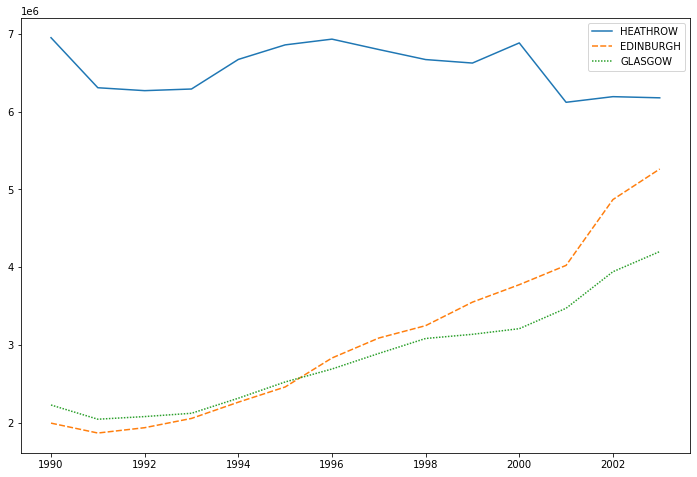

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_busiest_airports)